In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,0.0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,PP 9549,16.7000,G6,0.0
11,12,1,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,113783,26.5500,C103,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",0,47.0,1,1,11751,52.5542,D35,0.0
872,873,0,1,"Carlsson, Mr. Frans Olof",1,33.0,0,0,695,5.0000,B51 B53 B55,0.0
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",0,56.0,0,1,11767,83.1583,C50,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,0.0


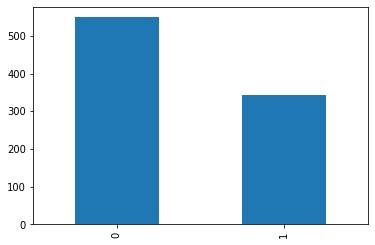

In [16]:
df = pd.read_csv("train.csv")
df["Age"].fillna(df["Age"].mean(), inplace=True)
df["Survived"].value_counts().plot.bar()
df["Fare"].fillna(df["Fare"].mean(), inplace=True)
# mapping features to numerical values
d1 = {"female": 0, "male": 1}
d2 = {"S": 0, "C": 1, "Q": 2}

# data resampling ?
df["Sex"] = df["Sex"].map(d1)
df["Embarked"] = df["Embarked"].map(d2)

In [21]:
extracted = df.drop(columns="PassengerId", axis=1).drop(columns="Name", axis=1).drop(columns="Cabin", axis=1).drop(columns="Ticket")
# find a way to deal with missing values: cut them off or take average value from its neighbors
extracted = extracted.dropna()
X = extracted.drop(columns="Survived", axis=1)
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,0.0
1,1,0,38.000000,1,0,71.2833,1.0
2,3,0,26.000000,0,0,7.9250,0.0
3,1,0,35.000000,1,0,53.1000,0.0
4,3,1,35.000000,0,0,8.0500,0.0
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,0.0
887,1,0,19.000000,0,0,30.0000,0.0
888,3,0,29.699118,1,2,23.4500,0.0
889,1,1,26.000000,0,0,30.0000,1.0


In [22]:
Y = extracted["Survived"]
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [145]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

#        why don't need to rescale data in trainnig stage
sc = StandardScaler()
scaler = sc.fit(X_train)
trainX_scaled = scaler.transform(X_train)
testX_scaled = scaler.transform(X_test)


clf = MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=1000, activation="relu", solver="adam")
clf.fit(trainX_scaled, Y_train)


MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=1000)

In [146]:
y_pred = clf.predict(testX_scaled)

print('Accuracy: {:.2f}'.format(accuracy_score(Y_test, y_pred)))
print(classification_report(y_pred, Y_test))

Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.95      0.86      0.90       130
           1       0.70      0.88      0.78        48

    accuracy                           0.87       178
   macro avg       0.82      0.87      0.84       178
weighted avg       0.88      0.87      0.87       178



c:\Users\18748\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\18748\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


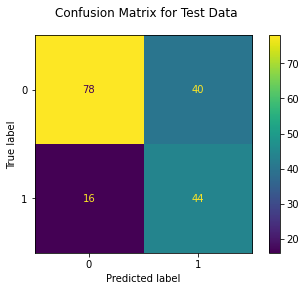

In [147]:
fig = plot_confusion_matrix(clf, X_test, Y_test, display_labels=clf.classes_)
fig.figure_.suptitle("Confusion Matrix for Test Data")
plt.show()

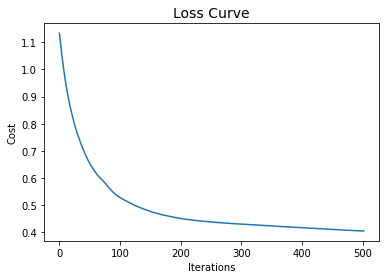

In [148]:
plt.plot(clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()